In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/creditcard.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

C:\Users\SEDA\AppData\Local\Temp\ipykernel_9056\3949857764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, ax=axes[0, 0], palette="pastel")
C:\Users\SEDA\AppData\Local\Temp\ipykernel_9056\3949857764.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1, 1], palette="pastel")


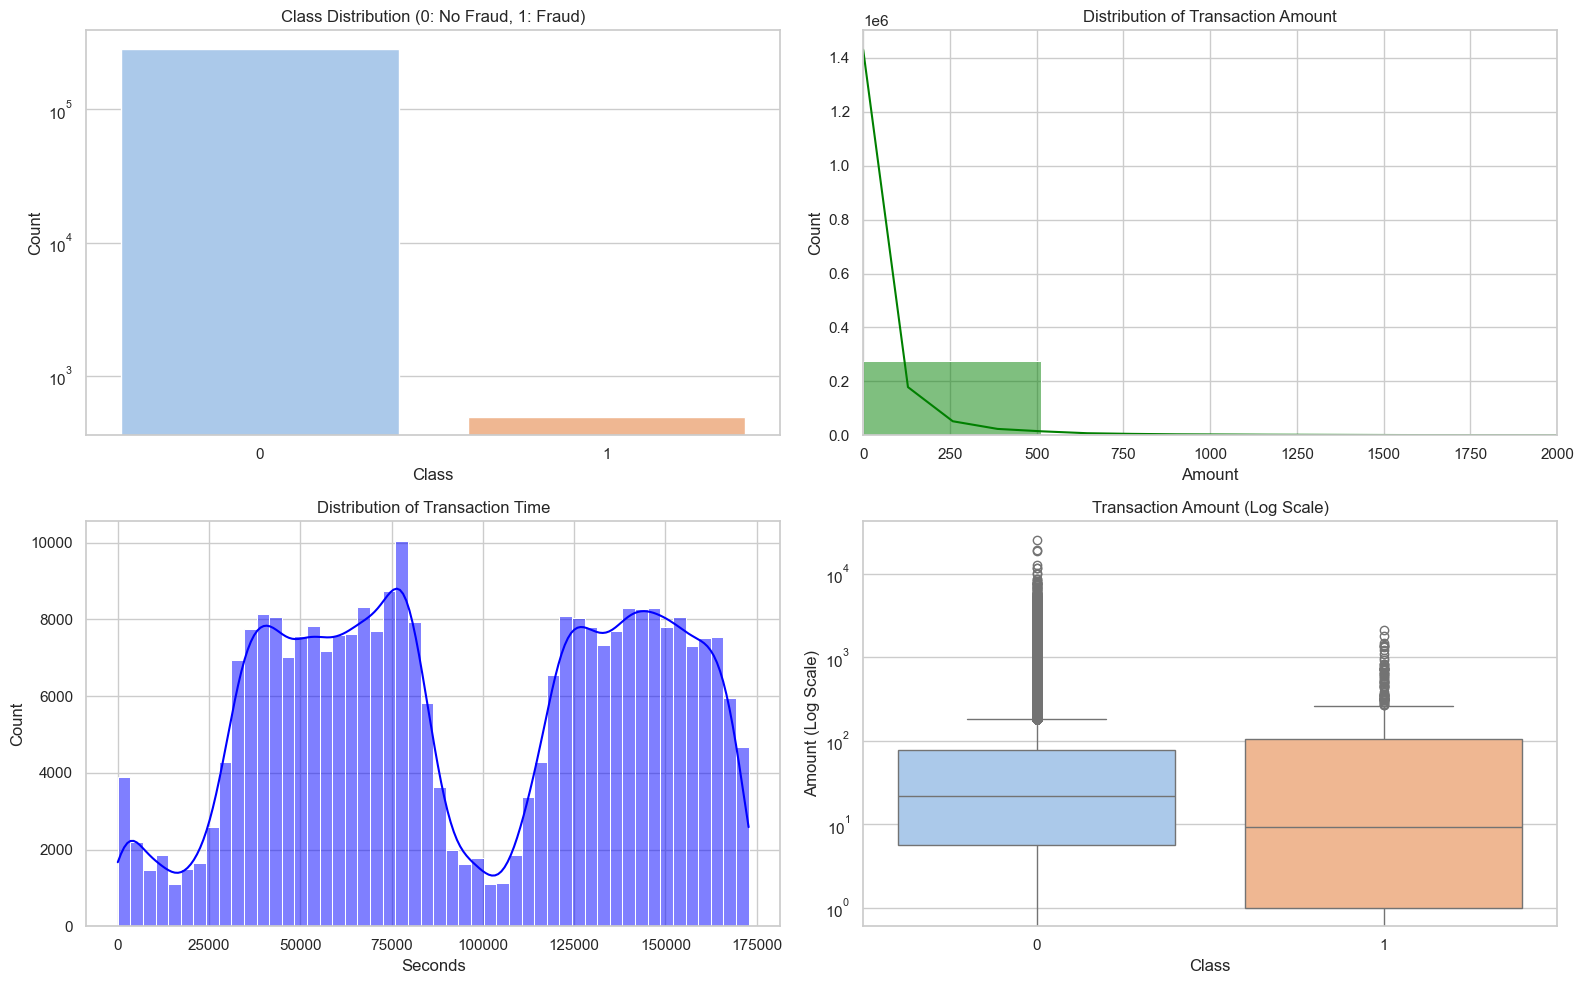

Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [4]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.countplot(x='Class', data=df, ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Class Distribution (0: No Fraud, 1: Fraud)')
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylabel('Count')

sns.histplot(df['Amount'], bins=50, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Distribution of Transaction Amount')
axes[0, 1].set_xlim(0, 2000)

sns.histplot(df['Time'], bins=50, ax=axes[1, 0], color='blue', kde=True)
axes[1, 0].set_title('Distribution of Transaction Time')
axes[1, 0].set_xlabel('Seconds')

sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1, 1], palette="pastel")
axes[1, 1].set_yscale("log")
axes[1, 1].set_title('Transaction Amount (Log Scale)')
axes[1, 1].set_ylabel('Amount (Log Scale)')

plt.tight_layout()
plt.show()

print("Class Counts:")
print(df['Class'].value_counts())
print("\nPercentage of Fraud:")
print(df['Class'].value_counts(normalize=True) * 100)

Top Positive Correlations with Class:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
Name: Class, dtype: float64
Top Negative Correlations with Class:
 V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64


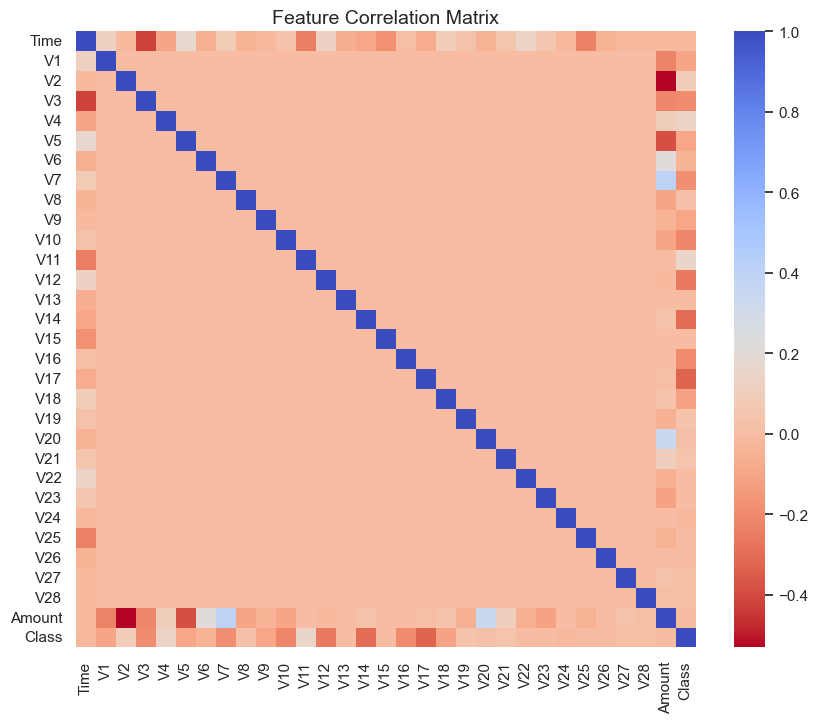

C:\Users\SEDA\AppData\Local\Temp\ipykernel_9056\3711284267.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=df, palette='pastel', ax=axes[0])
C:\Users\SEDA\AppData\Local\Temp\ipykernel_9056\3711284267.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=df, palette='pastel', ax=axes[1])
C:\Users\SEDA\AppData\Local\Temp\ipykernel_9056\3711284267.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=df, palette='pastel', ax=axes[2])
C:\Users\SEDA\AppData\Local\Temp\i

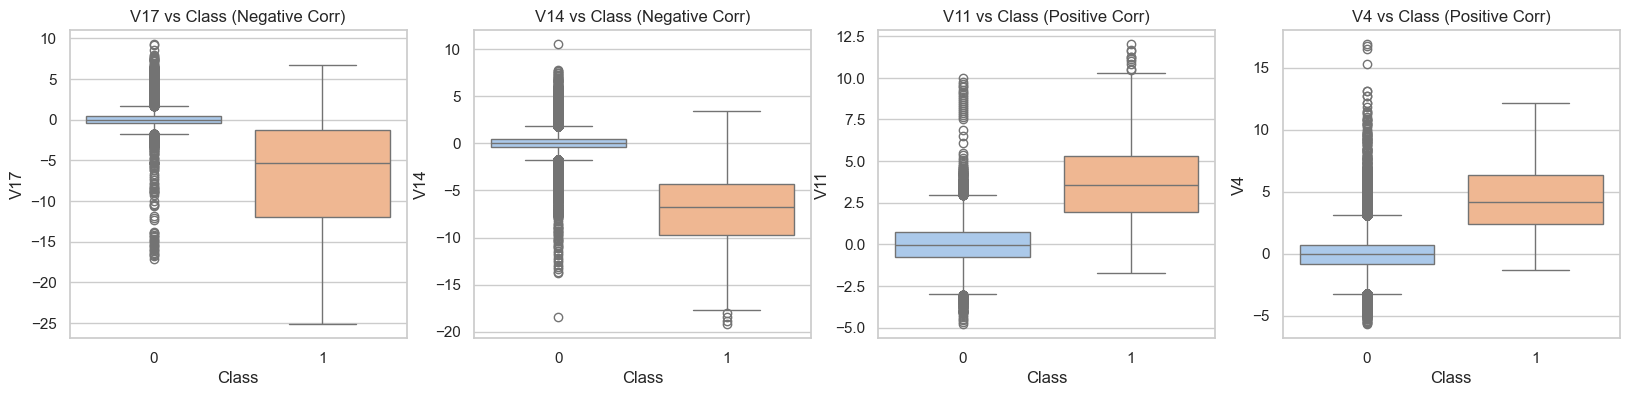

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

print("Top Positive Correlations with Class:\n", corr['Class'].sort_values(ascending=False).head(5))
print("Top Negative Correlations with Class:\n", corr['Class'].sort_values(ascending=True).head(5))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14)
plt.show()

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, palette='pastel', ax=axes[0])
axes[0].set_title('V17 vs Class (Negative Corr)')

sns.boxplot(x="Class", y="V14", data=df, palette='pastel', ax=axes[1])
axes[1].set_title('V14 vs Class (Negative Corr)')

sns.boxplot(x="Class", y="V11", data=df, palette='pastel', ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Corr)')

sns.boxplot(x="Class", y="V4", data=df, palette='pastel', ax=axes[3])
axes[3].set_title('V4 vs Class (Positive Corr)')

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print("Data after scaling:")
print(df.head())

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of Training Data:", X_train.shape)
print("Shape of Test Data:", X_test.shape)

Data after scaling:
   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V2

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import numpy as np
from xgboost import XGBClassifier

counts = y_train.value_counts()
weight_ratio = counts[0] / counts[1]
print(f"Class Weight Ratio: {weight_ratio:.2f}")

classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
    
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, n_jobs=-1),
    
    "XGBoost": XGBClassifier(scale_pos_weight=weight_ratio, eval_metric='logloss', random_state=42, use_label_encoder=False)
}

Class Weight Ratio: 577.29


Training Logistic Regression...
--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

------------------------------
Training Random Forest...
--- Random Forest Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------
Training XGBoost...


c:\Users\SEDA\anaconda3\envs\ml1\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:51:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------


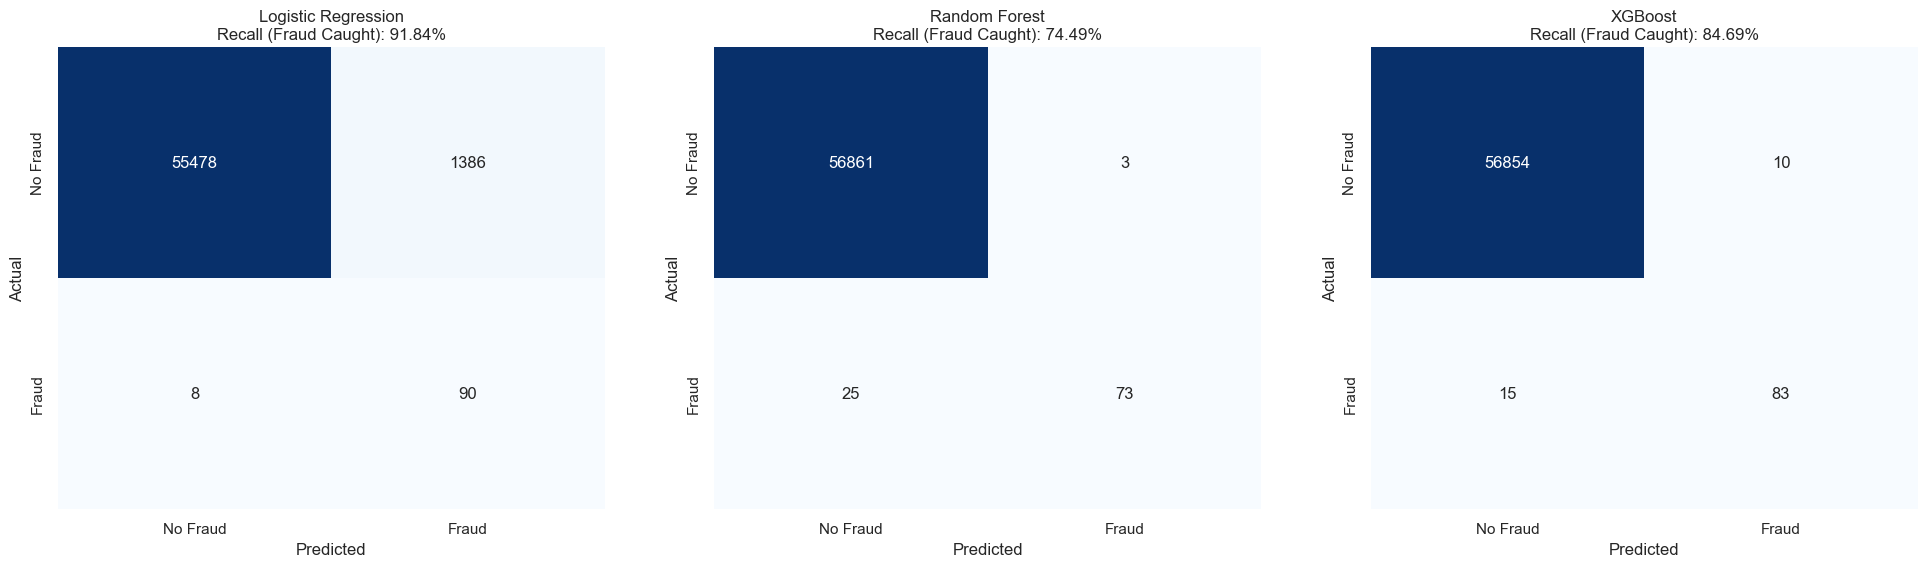

In [8]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

for i, (name, model) in enumerate(classifiers.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], cbar=False)
    axes[i].set_title(f"{name}\nRecall (Fraud Caught): {recall:.2%}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(['No Fraud', 'Fraud'])
    axes[i].set_yticklabels(['No Fraud', 'Fraud'])

    print(f"--- {name} Report ---")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

plt.show()